In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

# Merge the different samples

In [2]:
# PF1
pf1 = sc.read_mtx("datasets/gse158723/GSM4808962_156-PF1_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808962_156-PF1_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808962_156-PF1_barcodes.tsv", sep="\t", header=None)
pf1.var_names = genes.iloc[:,1]
pf1.obs_names = barcodes.iloc[:,0]
pf1.var_names_make_unique()
pf1.obs_names_make_unique()

# PF2
pf2 = sc.read_mtx("datasets/gse158723/GSM4808963_156-PF2_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808963_156-PF2_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808963_156-PF2_barcodes.tsv", sep="\t", header=None)
pf2.var_names = genes.iloc[:,1]
pf2.obs_names = barcodes.iloc[:,0]
pf2.var_names_make_unique()
pf2.obs_names_make_unique()

# NPF1
npf1 = sc.read_mtx("datasets/gse158723/GSM4808964_156-NPF1_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808964_156-NPF1_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808964_156-NPF1_barcodes.tsv", sep="\t", header=None)
npf1.var_names = genes.iloc[:,1]
npf1.obs_names = barcodes.iloc[:,0]
npf1.var_names_make_unique()
npf1.obs_names_make_unique()

# NPF2
npf2 = sc.read_mtx("datasets/gse158723/GSM4808965_156-NPF2_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808965_156-NPF2_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808965_156-NPF2_barcodes.tsv", sep="\t", header=None)
npf2.var_names = genes.iloc[:,1]
npf2.obs_names = barcodes.iloc[:,0]
npf2.var_names_make_unique()
npf2.obs_names_make_unique()

# PF
pf = sc.read_mtx("datasets/gse158723/GSM4808966_158-PF_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808966_158-PF_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808966_158-PF_barcodes.tsv", sep="\t", header=None)
pf.var_names = genes.iloc[:,1]
pf.obs_names = barcodes.iloc[:,0]
pf.var_names_make_unique()
pf.obs_names_make_unique()

# WF
wf = sc.read_mtx("datasets/gse158723/GSM4808967_158-WF_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808967_158-WF_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808967_158-WF_barcodes.tsv", sep="\t", header=None)
wf.var_names = genes.iloc[:,1]
wf.obs_names = barcodes.iloc[:,0]
wf.var_names_make_unique()
wf.obs_names_make_unique()

# NPF1_2
npf1_2 = sc.read_mtx("datasets/gse158723/GSM4808968_158-NPF1_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808968_158-NPF1_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808968_158-NPF1_barcodes.tsv", sep="\t", header=None)
npf1_2.var_names = genes.iloc[:,1]
npf1_2.obs_names = barcodes.iloc[:,0]
npf1_2.var_names_make_unique()
npf1_2.obs_names_make_unique()

# NPF2_2
npf2_2 = sc.read_mtx("datasets/gse158723/GSM4808969_158-NPF2_matrix.mtx").T
genes = pd.read_csv("datasets/gse158723/GSM4808969_158-NPF2_genes.tsv", sep="\t", header=None)
barcodes = pd.read_csv("datasets/gse158723/GSM4808969_158-NPF2_barcodes.tsv", sep="\t", header=None)
npf2_2.var_names = genes.iloc[:,1]
npf2_2.obs_names = barcodes.iloc[:,0]
npf2_2.var_names_make_unique()
npf2_2.obs_names_make_unique()


In [3]:
# concatenate
adata = pf1.concatenate(pf2, npf1, npf2, pf, wf, npf1_2, npf2_2)

In [4]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

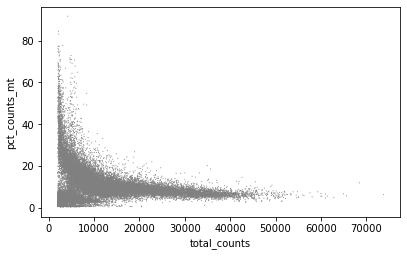

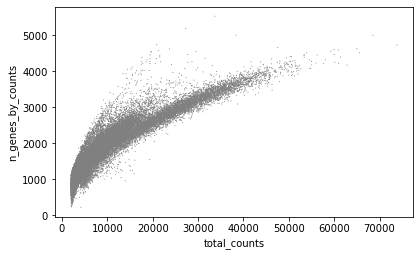

In [5]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [6]:
adata = adata[adata.obs.n_genes_by_counts < 4000, :]
adata = adata[adata.obs.pct_counts_mt < 30, :]
adata.raw = adata
adata.shape

(27816, 16872)

In [7]:
# normalization and scaling
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5, subset=True)
sc.pp.scale(adata, max_value=10)

# Dimensionality reduction and clustering

In [8]:
# PCA and UMAP
sc.tl.pca(adata, svd_solver='arpack')
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=40)
sc.tl.umap(adata)

In [9]:
# Perform clustering
sc.tl.leiden(adata, resolution=0.3)

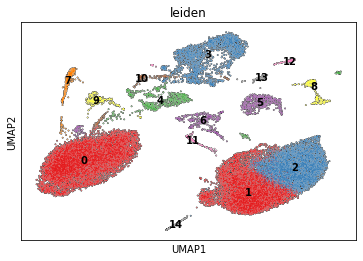

In [10]:
# Plot stuff
sc.pl.umap(adata, color=['leiden'], legend_loc="on data", palette="Set1", add_outline=True)

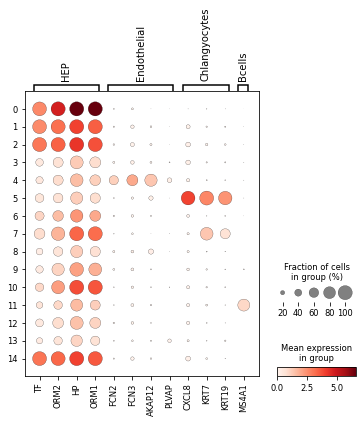

In [11]:
markers = {'HEP': ['TF', 'ORM2', 'HP', 'ORM1'],
          'Endothelial': ['FCN2', 'FCN3', 'AKAP12', 'PLVAP'],
          'Chlangyocytes': ['CXCL8', 'KRT7', 'KRT19'],
          'Bcells': ['MS4A1']}
sc.pl.dotplot(adata, markers, groupby='leiden', log=True)

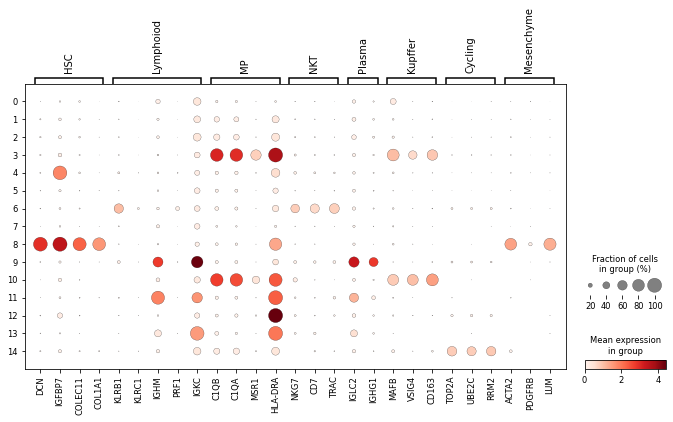

In [12]:
markers = {'HSC': ['DCN', 'IGFBP7', 'COLEC11', 'COL1A1'],
          'Lymphoiod': ['KLRB1', 'KLRC1', 'IGHM', 'PRF1', 'IGKC'],
          'MP': ['C1QB', 'C1QA', 'MSR1', 'HLA-DRA'],
          'NKT': ['NKG7', 'CD7','TRAC'],
          'Plasma': ['IGLC2', 'IGHG1'],
          'Kupffer': ['MAFB', 'VSIG4', 'CD163'],
          'Cycling': ['TOP2A', 'UBE2C', 'RRM2'],
          'Mesenchyme': ['ACTA2', 'PDGFRB', 'LUM']}
sc.pl.dotplot(adata, markers, groupby='leiden', log=True)

In [13]:
old_to_new = {
    '0':"Hepatocytes",
    '1':"Hepatocytes",
    '2':"Hepatocytes",
    '3':"MP",
    '4':"Endothelial",
    '5':"Chlangyocytes",
    '6':"NKT",
    '7':"Chlangyocytes",
    '8':"HSC",
    '9':"Lymphoid",
    '10':"MP",
    '11':"Bcells",
    '12':"MP",
    '13':"MP",
    '14':"Hepatocytes",
}
adata.obs['celltype'] = (
    adata.obs['leiden']
    .map(old_to_new)
    .astype('category')
)

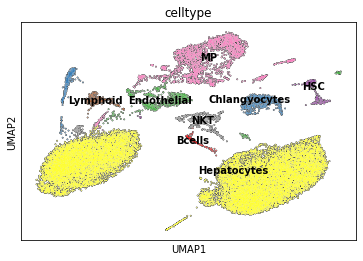

In [14]:
sc.pl.umap(adata, color="celltype", legend_loc="on data", palette="Set1", add_outline=True)

In [15]:
celltypes = adata.obs.celltype
adata = adata.raw.to_adata()

In [16]:
adata.write("gse158723_labeled.h5ad")